# **K MEANS - Image Segmentation**

In [1]:
from PIL import Image
import numpy as np

from sklearn.cluster import KMeans

In [2]:
img = Image.open("/content/image1.jpeg")
arr = np.array(img)

In [3]:
arr[0][0]

array([ 38, 129, 244], dtype=uint8)

In [4]:
arr.shape

(565, 567, 3)

In [5]:
arr[0]

array([[ 38, 129, 244],
       [ 38, 129, 244],
       [ 39, 128, 244],
       ...,
       [ 97, 140, 242],
       [ 97, 140, 242],
       [ 96, 139, 243]], dtype=uint8)

In [6]:
arr_n = arr.reshape(-1, 3)

In [7]:
arr_n[0]

array([ 38, 129, 244], dtype=uint8)

In [8]:
arr_n.shape

(320355, 3)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

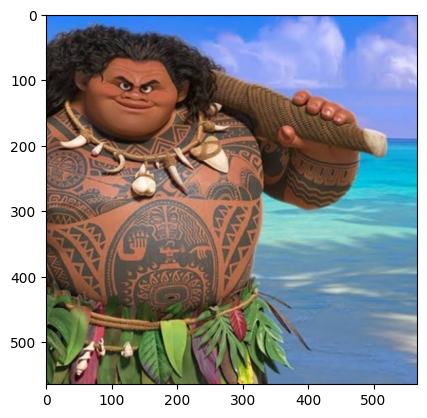

In [10]:
plt.imshow(arr)

In [11]:
kmeans = KMeans(n_clusters = 3)
arr_p = kmeans.fit_predict(arr_n)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
arr_p[0]

1

In [13]:
colours = {
    0 : [255, 0, 0],
    1 : [0, 255, 0],
    2 : [0, 0, 255]
}

colour = lambda x : colours[x]

In [14]:
arr_s = np.array(list(map(colour, arr_p)))

In [15]:
arr_s[0]

array([  0, 255,   0])

In [16]:
arr_y = arr_s.reshape(565, -1, 3)

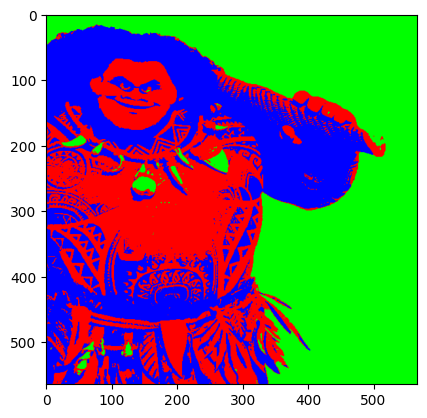

In [17]:
plt.imshow(arr_y)

In [18]:
def segmentation(img_path : str, clusters : int) -> None :
  colours = {
      0 : [255, 0, 0],
      1 : [0, 255, 0],
      2 : [0, 0, 255],
      3 : [255, 255, 0],
      4 : [255, 0, 255],
      5 : [0, 255, 255],
      6 : [0, 0, 0],
      7 : [255, 255, 255],
      8 : [255, 100, 0],
      9 : [255, 0, 100]
  }

  colour = lambda x : colours[x]

  arr = Image.open(img_path)
  arr = np.array(arr)

  orig_shape = arr.shape

  arr = arr.reshape(-1, 3)

  kmeans = KMeans(n_clusters = clusters)
  arr = kmeans.fit_predict(arr)

  arr = np.array(list(map(colour, arr)))
  arr = arr.reshape(orig_shape[0], orig_shape[1], 3)

  plt.imshow(arr)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


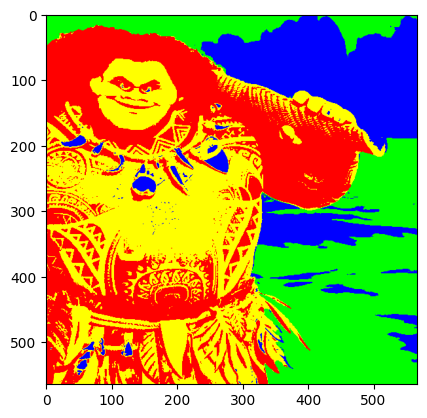

In [19]:
segmentation("image1.jpeg", 4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


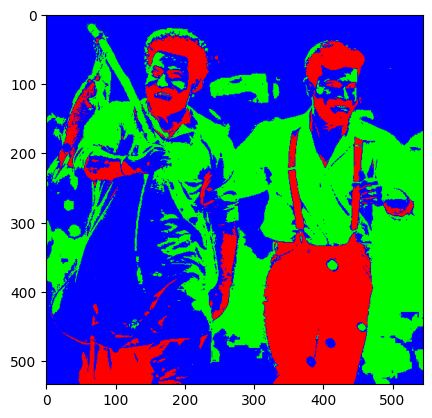

In [26]:
segmentation("image2.jpeg", 3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


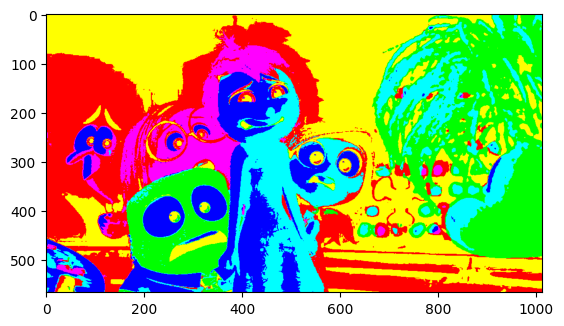

In [31]:
segmentation("image3.jpeg", 6)